In [30]:
import pandas as pd
df=pd.read_csv('owid-covid-data.csv')
newdf=df[df['location']=='India']
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [31]:
india=newdf[['iso_code','location','date','total_cases','new_cases','total_deaths']]
india.reset_index(inplace=True)
india=india.drop(['index'],axis=1)
india.head()

,iso_code,location,date,total_cases,new_cases,total_deaths
0,IND,India,2019-12-31,NaN,0.0,NaN
1,IND,India,2020-01-01,NaN,0.0,NaN
2,IND,India,2020-01-02,NaN,0.0,NaN
3,IND,India,2020-01-03,NaN,0.0,NaN
4,IND,India,2020-01-04,NaN,0.0,NaN


In [32]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


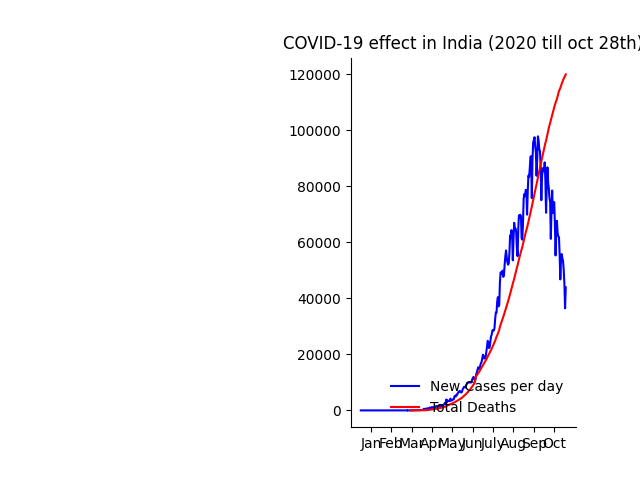

In [34]:
plt.figure(figsize=(9,5))
plt.plot(india['new_cases'],color='blue',label='New Cases per day')
plt.plot(india['total_deaths'],color='red',label='Total Deaths')
plt.legend(loc=4,frameon=False)
plt.title('COVID-19 effect in India (2020 till oct 28th)')
month_name=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct']
days=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]
months=[day+15 for day in days]
plt.xticks(months,month_name)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [1]:
import pandas as pd
df1=pd.read_csv('Unemployment in India (1).csv')
df1.tail(50)
rural=df1[df1['Area']=='Rural']
urban=df1[df1['Area']=='Urban'].reset_index()
urban.drop(['index'],axis=1,inplace=True)

In [2]:
urban.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,6.09,4788661.0,37.45,Urban
1,Andhra Pradesh,30-06-2019,Monthly,3.80,4824630.0,36.76,Urban
2,Andhra Pradesh,31-07-2019,Monthly,5.64,4657443.0,36.10,Urban
3,Andhra Pradesh,31-08-2019,Monthly,4.61,4743179.0,36.29,Urban
4,Andhra Pradesh,30-09-2019,Monthly,6.01,4733996.0,36.69,Urban


In [3]:
rural=rural.rename(columns={' Date':'Date', ' Frequency':'Frequency', ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
       ' Estimated Employed':'Estimated Employed', ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'})

urban=urban.rename(columns={' Date':'Date', ' Frequency':'Frequency', ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
       ' Estimated Employed':'Estimated Employed', ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'})

In [4]:
rural['month']=rural['Date'].apply(lambda x: x[4:6])
urban['month']=urban['Date'].apply(lambda x: x[4:6])
rural['year']=rural['Date'].apply(lambda x: x[-4:])
urban['year']=urban['Date'].apply(lambda x: x[-4:])


In [6]:
rural=rural[rural['year']=='2020']
urban=urban[urban['year']=='2020']


In [7]:
import numpy as np
r=rural.groupby(rural['month']).agg({'Estimated Unemployment Rate (%)':np.mean})
u=urban.groupby(urban['month']).agg({'Estimated Unemployment Rate (%)':np.mean})

In [8]:
r['Estimated Unemployment Rate (%)']

month
01     7.842692
02     8.752308
03     9.683333
04    21.746000
05    21.210800
06    11.825200
Name: Estimated Unemployment Rate (%), dtype: float64

In [9]:
u['Estimated Unemployment Rate (%)']

month
01    11.980741
02    11.132222
03    11.572500
04    25.464231
05    28.398846
06    11.982000
Name: Estimated Unemployment Rate (%), dtype: float64

<IPython.core.display.Javascript object>


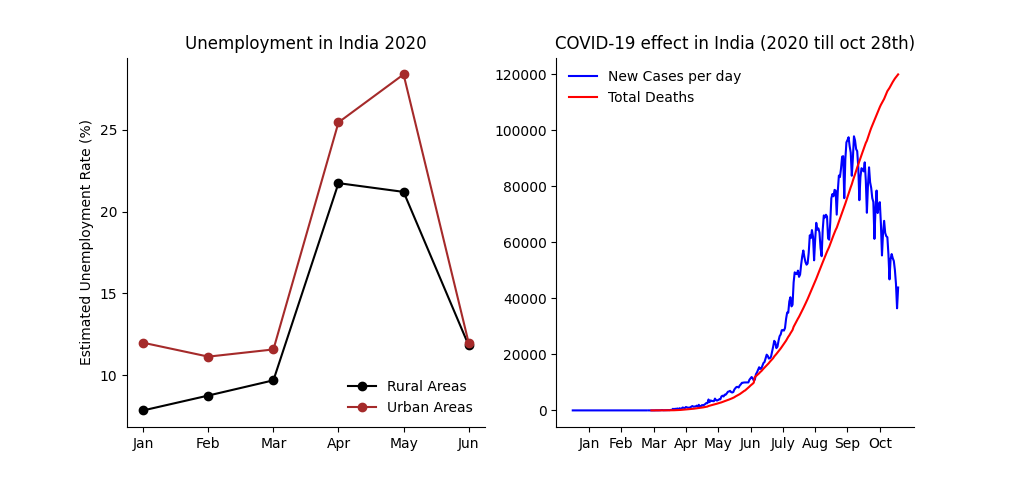

In [41]:
plt.figure(figsize=(10,5))
ax2=plt.subplot(1,2,2)
plt.plot(india['new_cases'],color='blue',label='New Cases per day')
plt.plot(india['total_deaths'],color='red',label='Total Deaths')
plt.legend(frameon=False)
plt.title('COVID-19 effect in India (2020 till oct 28th)')
month_name=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct']
days=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]
months=[day+15 for day in days]
plt.xticks(months,month_name)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#############################################################################################
ax1=plt.subplot(1,2,1)
plt.plot(r['Estimated Unemployment Rate (%)'],'-o',color='black',label='Rural Areas')
plt.plot(u['Estimated Unemployment Rate (%)'],'-o',color='brown',label='Urban Areas')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment in India 2020')
Xvalues=plt.gca().get_xticks()
months=['Jan','Feb','Mar','Apr','May','Jun']
plt.xticks(Xvalues,months)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4,frameon=False)


